In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datafb.perdatasets import robust_home, robust_vlcs,robust_terra, robust_pacs
from datafb.perdatasets.top1 import robusttop1_home, robusttop1_vlcs,robusttop1_terra, robusttop1_pacs

In [3]:
from codeplot.plot import *
import matplotlib.pyplot as plt


In [4]:

envs = list(range(4))
ll_m_home = [robust_home.l[key] for key in envs]
ll_m_hometop1 = [robusttop1_home.l[key] for key in envs]
ll_m_pacs = [robust_pacs.l[key] for key in envs]
ll_m_pacstop1 = [robusttop1_pacs.l[key] for key in envs]
ll_m_terra = [robust_terra.l[key] for key in envs]
ll_m_terratop1 = [robusttop1_terra.l[key] for key in envs]
ll_m_vlcs = [robust_vlcs.l[key] for key in envs]
ll_m_vlcstop1 = [robusttop1_vlcs.l[key] for key in envs]

In [5]:

labels = ["0 with M=1", "0 with M=20", "1 with M=1", "1 with M=20", "2 with M=1", "2 with M=20", "3 with M=1", "3 with M=20"]

In [6]:
def merge(l1, l2):
    for z1, z2 in zip(l1, l2):
        yield z1
        yield z2

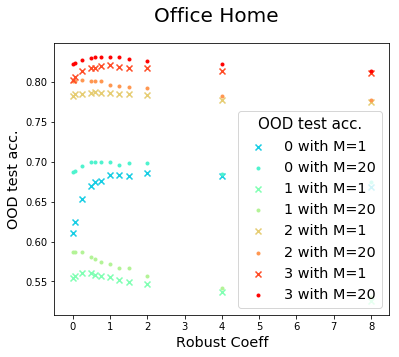

In [7]:
plt.rcParams["figure.figsize"] = (6,5)
dict_key_to_limit = {}
fig = plot_robust(list(merge(ll_m_hometop1, ll_m_home)), "robust", key_axis1="acc", key_axis2=None, labels=labels,
               legends=None, title="Office Home", loc="lower right")

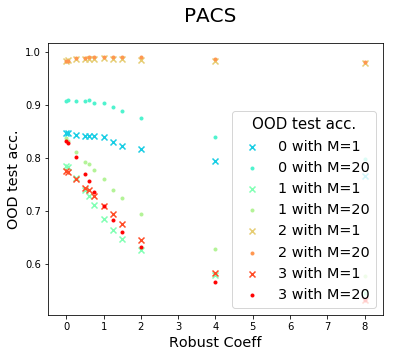

In [9]:
plt.rcParams["figure.figsize"] = (6,5)
dict_key_to_limit = {}
fig = plot_robust(list(merge(ll_m_pacstop1, ll_m_pacs)), "robust", key_axis1="acc", key_axis2=None, labels=labels,
               legends=None, title="PACS", loc="lower right")

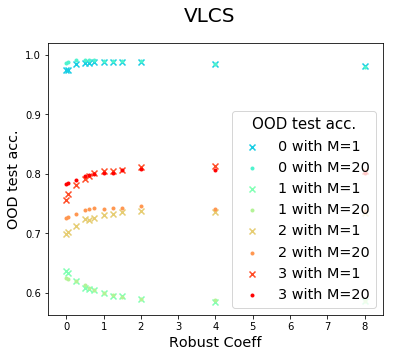

In [10]:
plt.rcParams["figure.figsize"] = (6,5)
dict_key_to_limit = {}
fig = plot_robust(list(merge(ll_m_vlcstop1, ll_m_vlcs)), "robust", key_axis1="acc", key_axis2=None, labels=labels,
               legends=None, title="VLCS", loc="lower right")

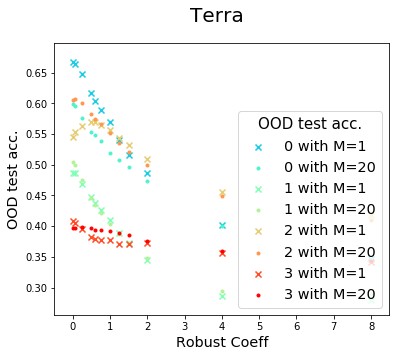

In [11]:
plt.rcParams["figure.figsize"] = (6,5)
dict_key_to_limit = {}
fig = plot_robust(list(merge(ll_m_terratop1, ll_m_terra)), "robust", key_axis1="acc", key_axis2=None, labels=labels,
               legends=None, title="Terra", loc="lower right")

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)

In [ ]:
dict_key_to_limit = {}
fig = plot_robust(ll_m_home + ll_m_hometop1, "robust", key_axis1="acc", key_axis2=None, labels=envs,
               legends=["Test env", ], title="Office Home M=20", loc="lower right")

In [ ]:
dict_key_to_limit = {}
fig = plot_robust(ll_m_pacs, "robust", key_axis1="acc", key_axis2=None, labels=envs,
               legends=["Test env", ], title="PACS M=20", loc="lower right")

In [ ]:
dict_key_to_limit = {}
fig = plot_robust(ll_m_terra, "robust", key_axis1="acc", key_axis2=None, labels=envs,
               legends=["Test env", ], title="Terra M=20", loc="lower right")

In [ ]:
dict_key_to_limit = {}
fig = plot_robust(ll_m_vlcs, "robust", key_axis1="acc", key_axis2=None, labels=envs,
               legends=["Test env", ], title="VLCS M=20", loc="lower right")

In [ ]:
dict_key_to_limit = {"step": [1, 5000], "acc": [0.63, 0.7], "train_acc": [0.8, 0.87]}
fig = plot_iter(ll_m_r_top1, "step", key_axis1="train_acc", key_axis2=None, labels=labels_robust_keys_lp,
               legends=["Robust Coeff"], title=None)

In [ ]:
dict_key_to_limit = {"step": [1, 5000], "acc": [0.7, 0.76], "train_acc": [0.67, 0.87]}
fig = plot_iter(ll_m_llr, "step", orders=["2", "2"], key_axis1="train_acc", labels=robust_keys)

In [ ]:
dict_key_to_limit = {"step": [1, 5000], "acc": [0.7, 0.76], "train_acc": [0.67, 0.87]}
fig = plot_iter(ll_m_diwa, "step", orders=["2", "2"], key_axis1="train_acc", labels=robust_keys_diwa)

In [ ]:
dict_key_to_limit = {"step": [1, 5000], "acc": [0.7, 0.76], "train_acc": [0.67, 0.87]}
fig = plot_iter(ll_m_llr, "step", orders=["2", "2"], key_axis1="train_acc", legends=["coeff"])

In [ ]:
def get_at_step(l_m, step):
    for l in l_m:
        if l["step"] == step:
            return l
    raise ValueError(step)
    

In [ ]:
steps = [100, 200, 500, 800, 1000, 1200, 1500, 2000, 2500, 3000, 4000]
labels = [f"{step}" for step in steps]
def get_llm(ll_m_diwa):
    ll_m = [
        [get_at_step(l_m_diwa, step) for l_m_diwa in ll_m_diwa]
        for step in steps]

    return ll_m


In [ ]:
plt.rcParams["figure.figsize"] = (6,6)
fig = plot_iter(get_llm(ll_m_r_top1), "train_acc", key_axis1="acc", labels=labels, legends=["step"], title="M=1", key_annot=None)

In [ ]:
plt.rcParams["figure.figsize"] = (6,6)
fig = plot_iter(get_llm(ll_m_r_diwa), "train_acc", key_axis1="acc", labels=labels, orders="2", legends=["step"], title="M=20", key_annot="robust")

In [ ]:
fig = plot_iter(get_llm(ll_m_diwa), "train_acc", key_axis1="acc", labels=labels, orders="2", legends=["step"], title="M=20")

In [ ]:
dict_key_to_limit = {"step": [-10, 5000], "acc": [0.69, 0.755], "train_acc": [0.7, 0.867]}
fig = plot_iter(get_llm(ll_m_top1), "train_acc", key_axis1="acc", labels=labels, orders="2", legends=["step"], title="Top 1")

In [ ]:
fig = plot_iter(ll_m, "train_acc", key_axis1="acc", labels=labels, orders="2", legends=["step"], title="M=20")

In [ ]:
dict_key_to_limit = {"step": [-10, 5000], "acc": [0.676, 0.702], "train_acc": [0.825, 0.872]}
fig = plot_iter(list(robust_lp.l.values()), "train_acc", key_axis1="acc", orders=2, labels=["M=1", "M=2", "M=5", "M=10", "M=15", "M=20"],  key_annot="robust", )

In [ ]:
plt.rcParams["figure.figsize"] = (8,4)
dict_key_to_limit = {"step": [-10, 5000], "acc": [0.6, 0.705], "train_acc": [0.825, 0.885]}
fig = plot_iter([robust_lp.l[1], robust_lp.l[2], robust_lp.l[20]], "robust", orders=["2", "1"], key_axis1="acc",key_axis2="train_acc", add_legend=True, key_annot="robust", labels=["M=1", "M=2", "M=20"])

In [ ]:
fig = plot_iter([robust_lp.l[20]], "train_acc", key_axis1="acc", add_legend=None,  key_annot="robust", title="M=20", orders=2)

In [ ]:
fig = plot_iter(ll_m_top1, "step", order="", add_legend=True, key_axis1="acc")

In [ ]:

fig = plot_iter(ll_m_top1, "step", order="", add_legend=True, key_axis1="train_acc", key_axis2=None)#"train_acc")

In [ ]:

fig = plot_iter(ll_m_diwa, "step", order="", add_legend=True, key_axis1="train_acc", key_axis2=None)#"train_acc")